In [1]:
import pickle
from PyFVCOM.read import FileReader
from PyFVCOM.plot import Plotter, Time, Depth
from cmocean import cm
import numpy as np
import matplotlib.pyplot as plt
from PyFVCOM.tide import make_water_column
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [2]:
with open('duanmian.pkl','rb') as f:
    ds = pickle.load(f)

In [3]:
pkl_file = open('zhouwei_fvcom.pkl', 'rb')
fvcom = pickle.load(pkl_file)

In [4]:
datapath = '/public/home/gaoguandong/xrsh/work/pic/data/'
picpath = '/public/home/gaoguandong/xrsh/work/pic/pics/duanmian/sectionBC/ll/'

In [5]:
# fill_seabed makes the part of the plot below the seabed grey.
z = make_water_column(ds.variables['zeta'][:]._data.T, ds.variables['h'][:]._data, fvcom.grid.siglay[:,0:8])
x = np.tile(ds.variables['lon'][:],(20,1))
zu = np.mean(ds.variables['cxu'][:]._data,2)
zv = np.mean(ds.variables['cxv'][:]._data,2)

In [6]:
depth = np.tile(ds.variables['h']._data,(ds.time.shape[0],1)).T + ds.variables['zeta']._data

In [7]:
depth[:5,] = depth[:5,]*179.807*4
depth[5:,] = depth[5:,]*200.169*2

In [8]:
liuliang = np.mean(depth * zv,0) 

In [9]:
llB =  np.mean(depth[:5,] * zv[:5,],0) 
llC =  np.mean(depth[5:,] * zv[5:,],0) 

In [10]:
ds['liuliang'] = (('time'), liuliang)
ds['llB'] = (('time'), llB)
ds['llC'] = (('time'), llC)

In [11]:
llB.shape

(13860,)

In [12]:
with open('duanmian_flow.pkl','wb') as f:
    pickle.dump({'ds':ds},f)

In [13]:
np.mean(liuliang,0)

46.677857627845185

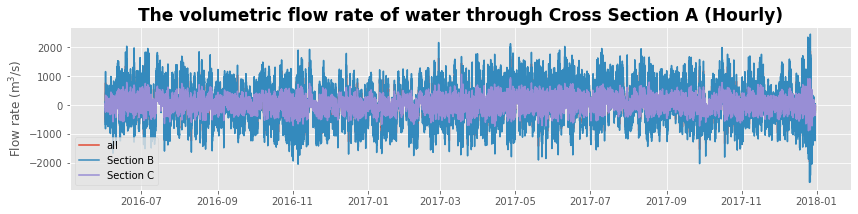

In [19]:
fig = plt.figure(figsize=(14, 3))  # size in inches
plt.subplots_adjust(hspace=0.01)
ax = fig.add_subplot(1, 1, 1)
time = ds.time
plt.style.use('ggplot')
ax.plot(time,liuliang,label = 'all')
ax.plot(time,llB,label = 'Section B')
ax.plot(time,llC,label = 'Section C')
plt.legend()

plt.title('The volumetric flow rate of water through Cross Section A (Hourly)',fontsize=17, fontweight='bold')
plt.ylabel('Flow rate (${m^3}$/s)')
plt.savefig(picpath+'liuliang_time_series_all.png',dpi=200)

# Daily mean

In [21]:
zvar = ds.resample(time = '1d').mean()['liuliang']
zvarB = ds.resample(time = '1d').mean()['llB']
zvarC = ds.resample(time = '1d').mean()['llC']

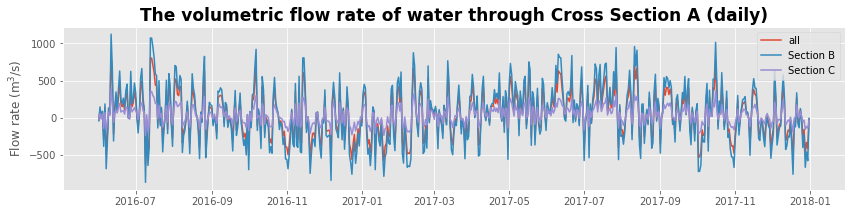

In [23]:
fig = plt.figure(figsize=(14, 3))  # size in inches
plt.subplots_adjust(hspace=0.01)
ax = fig.add_subplot(1, 1, 1)
time = zvar.time
plt.style.use('ggplot')
ax.plot(time,zvar,label = 'all')
ax.plot(time,zvarB,label = 'Section B')
ax.plot(time,zvarC,label = 'Section C')
plt.legend()
plt.title('The volumetric flow rate of water through Cross Section A (daily)',fontsize=17, fontweight='bold')
plt.ylabel('Flow rate (${m^3}$/s)')
plt.savefig(picpath+'liuliang_time_series_daily.png',dpi=200)

# Weekly mean

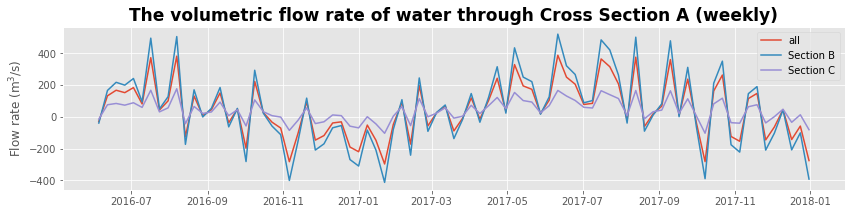

In [24]:
zvar = ds.resample(time = '1w').mean()['liuliang']
zvarB = ds.resample(time = '1w').mean()['llB']
zvarC = ds.resample(time = '1w').mean()['llC']
fig = plt.figure(figsize=(14, 3))  # size in inches
plt.subplots_adjust(hspace=0.01)
ax = fig.add_subplot(1, 1, 1)
time = zvar.time
plt.style.use('ggplot')
ax.plot(time,zvar,label = 'all')
ax.plot(time,zvarB,label = 'Section B')
ax.plot(time,zvarC,label = 'Section C')
plt.legend()
plt.title('The volumetric flow rate of water through Cross Section A (weekly)',fontsize=17, fontweight='bold')
plt.ylabel('Flow rate (${m^3}$/s)')
plt.savefig(picpath+'liuliang_time_series_weekly.png',dpi=200)

# Month Mean

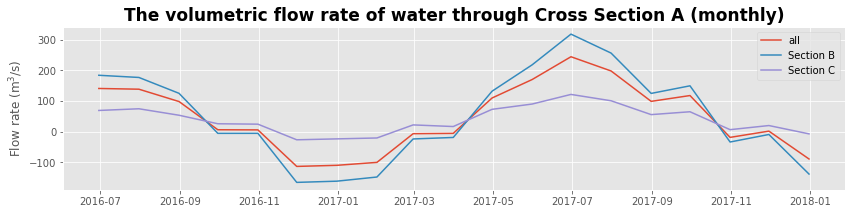

In [25]:
zvar = ds.resample(time = '1m').mean()['liuliang']
zvarB = ds.resample(time = '1m').mean()['llB']
zvarC = ds.resample(time = '1m').mean()['llC']
fig = plt.figure(figsize=(14, 3))  # size in inches
plt.subplots_adjust(hspace=0.01)
ax = fig.add_subplot(1, 1, 1)
time = zvar.time
plt.style.use('ggplot')
ax.plot(time,zvar,label = 'all')
ax.plot(time,zvarB,label = 'Section B')
ax.plot(time,zvarC,label = 'Section C')
plt.legend()
plt.title('The volumetric flow rate of water through Cross Section A (monthly)',fontsize=17, fontweight='bold')
plt.ylabel('Flow rate (${m^3}$/s)')
plt.savefig(picpath+'liuliang_time_series_monthly.png',dpi=200)

# Year Mean

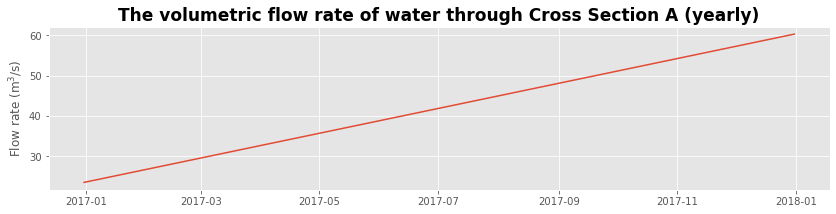

In [26]:
zvar = ds.resample(time = '1y').mean()['liuliang']
fig = plt.figure(figsize=(14, 3))  # size in inches
plt.subplots_adjust(hspace=0.01)
ax = fig.add_subplot(1, 1, 1)
time = zvar.time
ax.plot(time,zvar)
plt.title('The volumetric flow rate of water through Cross Section A (yearly)',fontsize=17, fontweight='bold')
plt.ylabel('Flow rate (${m^3}$/s)')
plt.savefig(picpath+'liuliang_time_series_yearly.png',dpi=200)